In [66]:
from minIA.models import Delf
import matplotlib.pyplot as plt
import cv2 as cv

#Recibe lista de keypoints de una imagen, crea los objetos KP de openCV
def genKeyPoints(kp_img):
    keypoints = list()
    for kp in kp_img:
        keypoints.append(cv.KeyPoint(kp[1]+13, kp[0], 32*kp[2]))#424/32
    return keypoints

image_test_path = '/data/images/images_gz2/13827.jpg'


[[160. 224.   1.]
 [224. 192.   1.]
 [256. 192.   1.]
 [192. 224.   1.]]


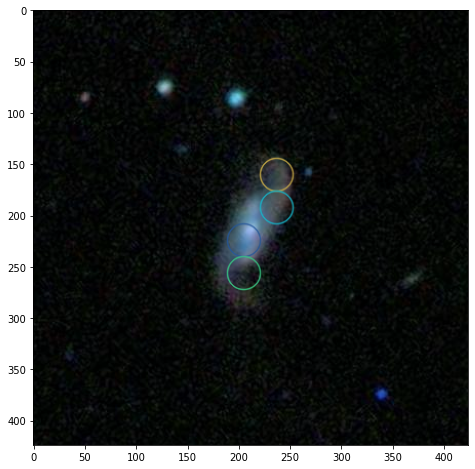

In [68]:
extractor = Delf('/data/config/delf_config_galaxy_v3-0_1.pbtxt')
features = extractor.get_features(image_test_path)
print(features['keypoints'])
img = cv.imread(image_test_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if len(features['keypoints']) == 0:
    print('Vacio')
keypoints = genKeyPoints(features['keypoints'])
img = cv.drawKeypoints(img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Aqui no quitar
#cv.imwrite('/data/images/F125_draw.jpg', img)
plt.figure(figsize=(20,8))
plt.imshow(img)

[[160.  224.    0.5]
 [256.  192.    0.5]
 [160.  240.    0.5]
 [144.  224.    0.5]
 [208.  208.    0.5]
 [224.  208.    0.5]
 [224.  192.    0.5]
 [272.  208.    0.5]]


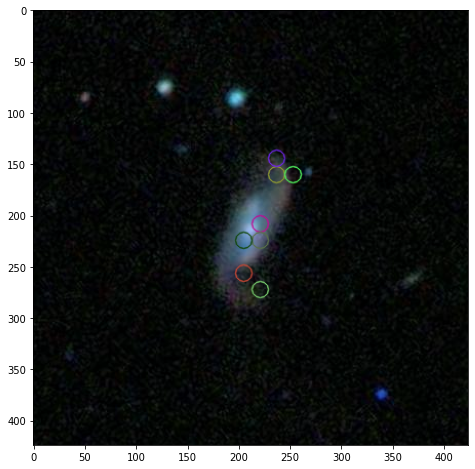

In [69]:
extractor = Delf('/data/config/delf_config_galaxy_v3-0_2.pbtxt')
features = extractor.get_features(image_test_path)
print(features['keypoints'])
img = cv.imread(image_test_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if len(features['keypoints']) == 0:
    print('Vacio')
keypoints = genKeyPoints(features['keypoints'])
img = cv.drawKeypoints(img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(20,8))
plt.imshow(img)

[[192. 192.   2.]]


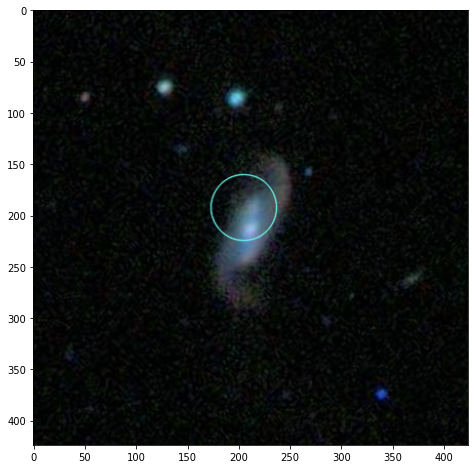

In [71]:
extractor = Delf('/data/config/delf_config_galaxy_v3-0_05.pbtxt')
features = extractor.get_features(image_test_path)
print(features['keypoints'])
img = cv.imread(image_test_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if len(features['keypoints']) == 0:
    print('Vacio')
keypoints = genKeyPoints(features['keypoints'])
img = cv.drawKeypoints(img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Aqui no quitar
#cv.imwrite('/data/images/F125_draw.jpg', img)
plt.figure(figsize=(20,8))
plt.imshow(img)

[[128. 128.   4.]
 [  0. 128.   4.]]


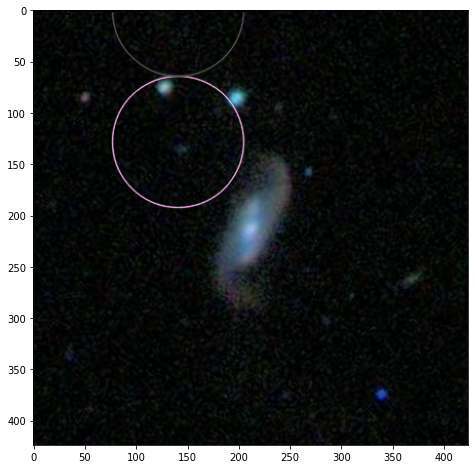

In [72]:
extractor = Delf('/data/config/delf_config_galaxy_v3-0_025.pbtxt')
features = extractor.get_features(image_test_path)
print(features['keypoints'])
img = cv.imread(image_test_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if len(features['keypoints']) == 0:
    print('Vacio')
keypoints = genKeyPoints(features['keypoints'])
img = cv.drawKeypoints(img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Aqui no quitar
#cv.imwrite('/data/images/F125_draw.jpg', img)
plt.figure(figsize=(20,8))
plt.imshow(img)

[[1.5839345e+02 2.2627635e+02 7.0711356e-01]
 [1.6000000e+02 2.2400000e+02 5.0000000e-01]
 [1.6000000e+02 2.2400000e+02 1.0000000e+00]
 [2.5600000e+02 1.9200000e+02 5.0000000e-01]
 [2.6128848e+02 1.9596637e+02 4.0826327e-01]
 [1.5677310e+02 2.3515964e+02 4.0826327e-01]
 [1.6000000e+02 2.4000000e+02 5.0000000e-01]
 [1.5677310e+02 2.2209521e+02 4.0826327e-01]
 [1.4400000e+02 2.2400000e+02 5.0000000e-01]
 [2.0364871e+02 2.0364871e+02 7.0711356e-01]
 [2.2627635e+02 2.0364871e+02 7.0711356e-01]
 [2.2400000e+02 1.9200000e+02 1.0000000e+00]
 [2.5600000e+02 1.9200000e+02 1.0000000e+00]
 [2.7153162e+02 2.0364871e+02 7.0711356e-01]
 [1.6983752e+02 2.3515964e+02 4.0826327e-01]
 [2.4890399e+02 2.0364871e+02 7.0711356e-01]
 [1.6983752e+02 2.2209521e+02 4.0826327e-01]
 [2.0800000e+02 2.0800000e+02 5.0000000e-01]
 [1.9200000e+02 1.9200000e+02 2.0000000e+00]
 [1.8102107e+02 2.2627635e+02 1.4142271e+00]
 [1.3576581e+02 2.2627635e+02 1.4142271e+00]
 [2.2400000e+02 2.0800000e+02 5.0000000e-01]
 [1.357658

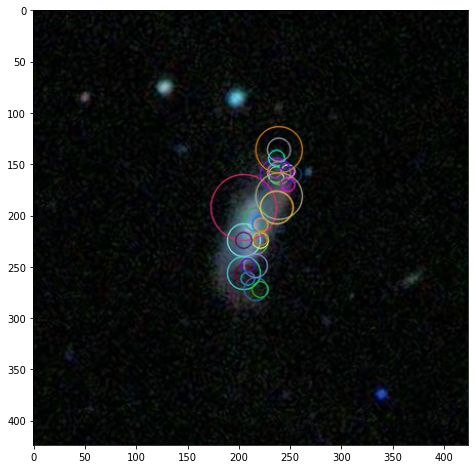

In [88]:
extractor = Delf('/data/config/delf_config_galaxy_v3-0_full.pbtxt')
features = extractor.get_features(image_test_path)
print(features['keypoints'])
img = cv.imread(image_test_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
if len(features['keypoints']) == 0:
    print('Vacio')
keypoints = genKeyPoints(features['keypoints'])
img = cv.drawKeypoints(img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # Aqui no quitar
#cv.imwrite('/data/images/F125_draw.jpg', img)
plt.figure(figsize=(20,8))
plt.imshow(img)